# Disease Modeling with Python

### In this document, we model the progression of Hepatitis B over time using Python. These tools can provide useful insights for any diseased modeled by Markov processes.

By Mehlika Toy, Anthony Degleris, and Tejpal Virdi

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import reader
import matrixoperations as mat
%matplotlib inline

# Loading the data

- First we import the data from an Excel file; this file can be modified by anyone, even without a computer science background
- Next we set the number of years to run the model (you could also change this to months, days, or any other unit of time)
- Finally we choose a start state.
- In this example, we are simulating a 45 year old male with Cirrhosis for 20 years

In [2]:
model, states = reader.generate_model('matrix.xlsx', age=45, female=False)

times = 20  # Number of years

print(states)
start_state = np.zeros(len(states))
start_state[2] = 1  # Start from the compensated cirrhosis

['Active CHB HBeAg-positive' 'Active CHB HBeAg-negative'
 'Compensated Cirrhosis' 'Decompensated Cirrhosis' 'HCC' 'Inactive'
 'Viral Suppression Cirrhosis' 'Viral Suppression Decompensated Cirrhosis'
 'Liver Transplantation Decompensated Cirrhosis'
 'Liver Transplantation HCC' 'HBsAg loss' 'HBV Death' 'Death other']


# Visualizing the data

- In this visual, we plot a select number of states over time
- Each line represents the probability of being in a certain state during that year
- This visual reveals that after 20 years, the individual has a good chance of HBV Death

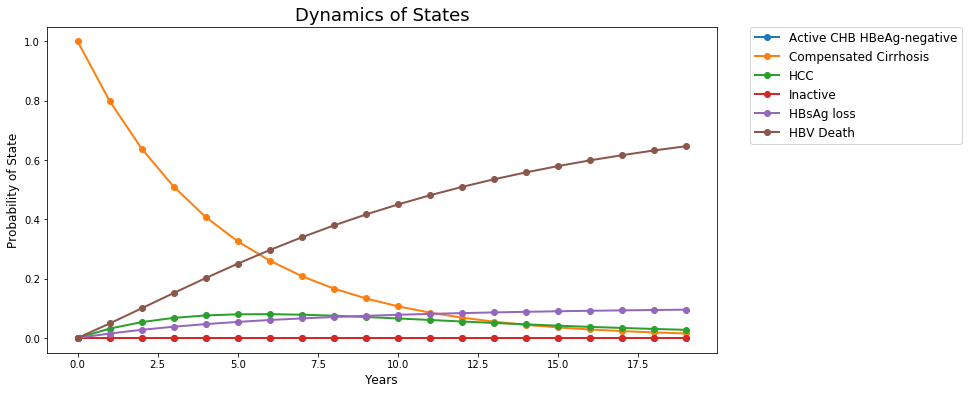

In [3]:
plt.figure(figsize=(12,6))

for i in [1, 2, 4, 5, 10, 11]:
    y = [mat.iter(model, t).dot(start_state)[i] for t in range(times)]
    plt.plot(range(times), y, label=states[i], linewidth=2, marker='o')
    

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Probability of State', fontsize=12)
plt.title('Dynamics of States', fontsize=18)
plt.show()